##Importing libraries

In [10]:
import pandas as pd
import numpy as np

##Importing Dataset

In [11]:
dataset = pd.read_csv('IMDB Dataset.csv')

##Checking the Dataset if it has null values

In [12]:
dataset.isnull().sum()

,0
review,0
sentiment,0


##Importing nessesary libraries for text extraction and Regression

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Converting the sentences into root form

In [14]:
ps = PorterStemmer()
all_stopwords = set(stopwords.words('english'))
all_stopwords -= {'not', 'no', 'very', 'the', 'a', 'is'}

corpus = []
for review in dataset.iloc[:,0]:
    text = re.sub('[^a-zA-Z]', ' ', review)
    text = text.lower().split()
    text = [ps.stem(word) for word in text if word not in all_stopwords]
    corpus.append(' '.join(text))

##Label encoding the test set

In [15]:
y = dataset.iloc[:,1]
le = LabelEncoder()
y = le.fit_transform(y)

##Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=0)

##Creating BoW Vectorization

In [17]:
bag_vectorizer = CountVectorizer(max_features=5000)
X_train_bag = bag_vectorizer.fit_transform(X_train)
X_test_bag = bag_vectorizer.transform(X_test)

##Using Logistic Regression and training on training set

In [18]:
logistic_bag = LogisticRegression(max_iter=10000)
logistic_bag.fit(X_train_bag, y_train)
pred_logistic_bag = logistic_bag.predict(X_test_bag)

##Using Linear SVC and training on training set

In [19]:
svc_bag = LinearSVC(max_iter=10000, random_state=0)
svc_bag.fit(X_train_bag, y_train)
pred_svc_bag = svc_bag.predict(X_test_bag)

##Using Multinomial Naive Bayes and training on training set

In [20]:
nb_bag = MultinomialNB()
nb_bag.fit(X_train_bag, y_train)
pred_nb_bag = nb_bag.predict(X_test_bag)

##Visualizing the training and prediction results

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
acc_logistic_bag = accuracy_score(y_test, pred_logistic_bag)
cm_logistic_bag = confusion_matrix(y_test, pred_logistic_bag)

acc_svc_bag = accuracy_score(y_test, pred_svc_bag)
cm_svc_bag = confusion_matrix(y_test, pred_svc_bag)

acc_nb_bag = accuracy_score(y_test, pred_nb_bag)
cm_nb_bag = confusion_matrix(y_test, pred_nb_bag)

print(f"Logistic Regression accuracy: {acc_logistic_bag:.2f}")
print(f"Confusion matrix for Logistic Regression:\n {cm_logistic_bag}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, pred_logistic_bag, target_names=['negative', 'positive']))

print("\n" + "="*30 + "\n")

print(f"Linear SVM accuracy: {acc_svc_bag:.2f}")
print(f"Confusion matrix for Linear SVM:\n {cm_svc_bag}")
print("Linear SVM Classification Report:")
print(classification_report(y_test, pred_svc_bag, target_names=['negative', 'positive']))

print("\n" + "="*30 + "\n")

print(f"Naive Bayes accuracy: {acc_nb_bag:.2f}")
print(f"Confusion matrix for Naive Bayes:\n {cm_nb_bag}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, pred_nb_bag, target_names=['negative', 'positive']))

Logistic Regression accuracy: 0.87
Confusion matrix for Logistic Regression:
 [[4359  676]
 [ 604 4361]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      5035
    positive       0.87      0.88      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Linear SVM accuracy: 0.87
Confusion matrix for Linear SVM:
 [[4331  704]
 [ 642 4323]]
Linear SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.86      0.87      5035
    positive       0.86      0.87      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Naive Bayes accuracy: 0.84
Confusion matrix for Naive Bayes:
 [[4274  761

In [24]:
print(f"As we can see Logistic Regression performs best here with an accuracy of: {acc_logistic_bag:.2}")

As we can see Logistic Regression performs best here with an accuracy of: 0.87


##Visualizing the training and prediction results through graphs

In [33]:
import matplotlib.pyplot as plt

def model_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 4))
    indices = range(50)
    plt.scatter(indices, y_true[:50], color='blue', label='Actual', alpha=0.7, s=50)
    plt.scatter(indices, y_pred[:50], color='red', label='Predicted', alpha=0.7, s=50)
    plt.xlabel('Review Number')
    plt.ylabel('Positive (1) / Negative (0)')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

##Logistic Regression graph

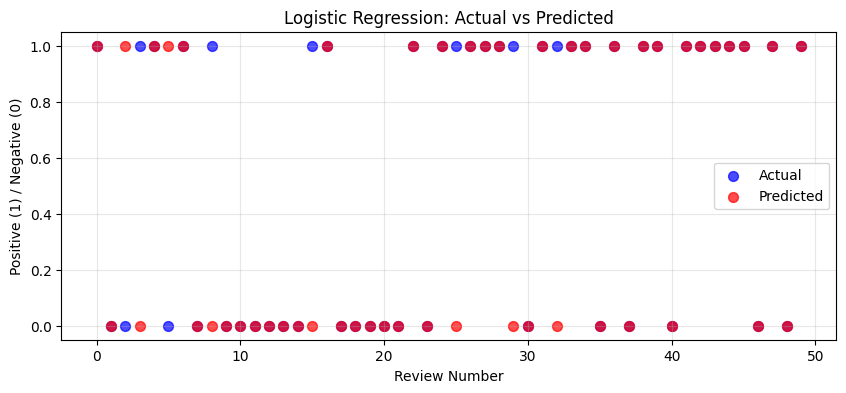

In [30]:
model_plot(y_test, pred_logistic_bag, 'Logistic Regression')

##Linear SVM graph

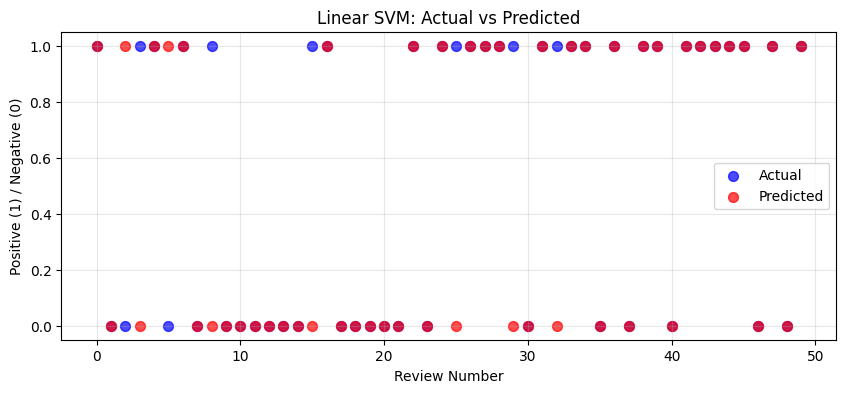

In [31]:
model_plot(y_test, pred_svc_bag, 'Linear SVM')

##Multinomial Naive Bayes graph

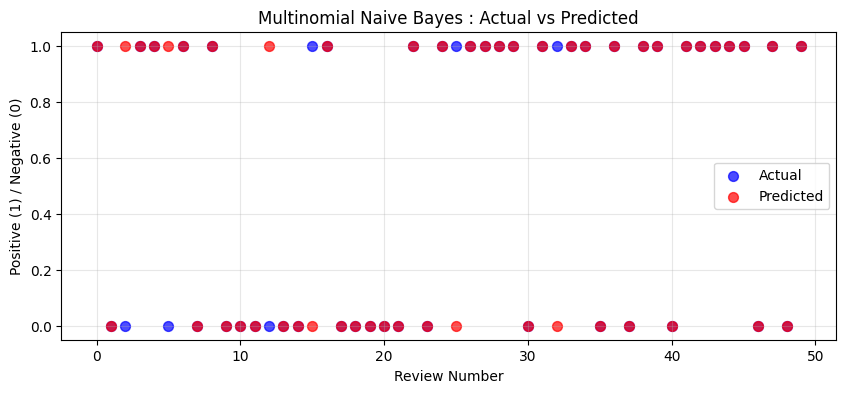

In [32]:
model_plot(y_test, pred_nb_bag, 'Multinomial Naive Bayes')